<style>
/* Three image containers (use 25% for four, and 50% for two, etc) */
.mycolumn {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clear floats after image containers */
.myrow::after {
  content: "";
  clear: both;
  display: table;
} 
 /* Responsive layout - makes the three columns stack on top of each other instead of next to each other */
@media screen and (max-width: 500px) {
  .mycolumn {
    width: 100%;
  }
} 
</style>

# Foreword
These slides are a notebook converted to (HTML) slides via the `jupyter-nbconvert` utility.  
Get the code from gitlab here: https://gitlab.com/carlomt/pycourse with, in an new terminal:
```bash
git clone https://gitlab.com/carlomt/pycourse
```


# Python (mainly numpy) refresh
 
This material is available on [gitlab](https://gitlab.com/carlomt/pycourse/)  
Contact us: [andrea.dotti@gmail.com](mailto:andrea.dotti@gmail.com), [mancinit@infn.it](mailto:mancinit@infn.it)

## Exercise

Write a code to compute pi using a MC approach, 

i.e. compute the finite integral between 0 and 1 of the function:

In [1]:
def f(x):
    return sqrt(1-x**2)

With python mathematical functions

To do so, import the module for random number generation and the `sqrt` function

In [6]:
import random
from math import sqrt

and generate random numbers as:

In [7]:
random.uniform(0,1.)

0.7534056659903301

## Exercise solution

In [8]:
import random
from math import sqrt

n = 0
N = 10000
for i in range(N):
    x = random.uniform(0.,1.)
    y = random.uniform(0.,1.)
    if (x**2 + y**2) <1 :
        n += 1
res = n/N * 4
print(res)

3.1424


# Scientific python stack
Get full documentation [here](https://docs.scipy.org/doc/#).  
Get a tutorial [here](http://scipy-lectures.org/index.html)

<img src="scipy.png">

The SciPy library contains several packages to perform specialized scientific calculations:
 * Special functions ([`scipy.special`](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html))
 * Integration ([`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html))
 * Optimization ([`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html))
 * Interpolation ([`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html))
 * Fourier Transforms ([`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html))
 * Signal Processing ([`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html))
 * Linear Algebra ([`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html))
 * Sparse Eigenvalue Problems with [ARPACK](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)
 * Compressed Sparse Graph Routines ([`scipy.sparse.csgraph`](https://docs.scipy.org/doc/scipy/reference/tutorial/csgraph.html))
 * Spatial data structures and algorithms ([`scipy.spatial`](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html))
 * Statistics ([`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html))
 * Multidimensional image processing ([`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html))
 * File IO ([`scipy.io`](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html))

<img src="NumPy_logo.svg"> 

## Numpy
It is the foundation of python scientific stack.  
The basic building block is the `numpy.array` data structure. It can be used as a python list of numbers, but it is a specialized efficient way of manipulating numbers in python.

In [9]:
import numpy as np
a = np.array([1, 2, 3, 4], dtype=float)
a

array([1., 2., 3., 4.])

In [10]:
a = range(1000)
%timeit [ i**2 for i in a]

22.9 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
b = np.arange(1000)
%timeit b**2

1.02 µs ± 45.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
c = np.array([[1,2],[3,4]])
c

array([[1, 2],
       [3, 4]])

In [5]:
c.ndim

2

In [6]:
c.shape

(2, 2)

In [7]:
c = np.arange(27)
c.reshape((3,3,3))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [8]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [9]:
np.ones((2,1))

array([[1.],
       [1.]])

In [10]:
a = np.arange(27).reshape((3,3,3))
np.ones_like(a)

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [11]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
a[0]

0

In [14]:
a[-1]

9

In [15]:
a[0:3]

array([0, 1, 2])

In [16]:
a[::2]

array([0, 2, 4, 6, 8])

In [17]:
a = a.reshape(5,2)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [18]:
a[3,1]

7

In [19]:
a[2,:]

array([4, 5])

### Important: Views or copy
A slice or reshape is a view, simply a re-organization of the same data in memory, thus changing one element changes the same element in all views

In [20]:
a = np.arange(9)

In [21]:
b = a.reshape((3,3))

In [22]:
np.shares_memory(a,b)

True

In [23]:
a[3] = -1

In [24]:
b

array([[ 0,  1,  2],
       [-1,  4,  5],
       [ 6,  7,  8]])

In [25]:
np.shares_memory(a,b)

True

In [26]:
b = a.copy()
np.shares_memory(a,b)

False

### Boolean masks for extracting values
A typical operation done in your daily physics data analysis is to extract from an array the values that match a condition.
Consider an array of the energies of particles, and assume you want to use only the energies above a given threshold. Boolean masking comes at a rescue

In [27]:
ene = np.random.exponential(size=10, scale=10.) # 1/scale e^(-ene/scale)
ene

array([26.78949043, 39.75183681,  0.36677236,  3.8809366 ,  0.54143778,
        3.64373788, 44.26306009,  0.63227985, 16.09218254,  5.13612747])

In [28]:
mask = ene > 2
mask

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True])

In [29]:
ene[mask]

array([26.78949043, 39.75183681,  3.8809366 ,  3.64373788, 44.26306009,
       16.09218254,  5.13612747])

In [30]:
ene[ene<2]

array([0.36677236, 0.54143778, 0.63227985])

In [31]:
ene[ene<2] = 0
ene

array([26.78949043, 39.75183681,  0.        ,  3.8809366 ,  0.        ,
        3.64373788, 44.26306009,  0.        , 16.09218254,  5.13612747])

### Values with list of indexes
Similarly to boolean masks, it is possible to access and modify values directly to an array using a list of indexes

In [32]:
status = np.random.randint(low=0,high=10,size=10)
status

array([3, 1, 3, 2, 1, 2, 8, 5, 7, 4])

In [33]:
status[[0, 3, 5]]

array([3, 2, 2])

In [34]:
status[[0, 3, 5]] = -1
status

array([-1,  1,  3, -1,  1, -1,  8,  5,  7,  4])

### Simple Operations

In [35]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [36]:
a+1

array([1, 2, 3, 4])

In [37]:
10**a

array([   1,   10,  100, 1000])

In [38]:
np.sin(a)

array([0.        , 0.84147098, 0.90929743, 0.14112001])

matrix multiplication

In [29]:
a = np.arange(1,5).reshape(2,2)
b = np.arange(5,9).reshape(2,2)
print(a)
print(b)
print("result: \n",a@b)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
result: 
 [[19 22]
 [43 50]]


### Reductions

In [39]:
a = np.random.randint(low=0,high=10,size=4)
a

array([2, 8, 7, 7])

In [40]:
np.sum(a)

24

In [41]:
np.max(a), np.min(a)

(8, 2)

In [42]:
np.argmax(a), np.argmin(a)

(1, 0)

In [43]:
np.mean(a), np.median(a), np.std(a)

(6.0, 7.0, 2.345207879911715)

In [44]:
a = a.reshape(2,2)
a

array([[2, 8],
       [7, 7]])

In [45]:
np.sum(a,axis=1)

array([10, 14])

In [46]:
m1 = a>3
m1

array([[False,  True],
       [ True,  True]])

In [47]:
np.all(m1)

False

In [48]:
np.any(m1)

True

do you remember that in python function arguments are passed by copy?

In [5]:
def f(x):
    x+=1

y = 1
f(y)
print(y)

1


this is NOT true for numpy arrays!

In [6]:
def f(x):
    x+=1

y = np.array([1])
f(y)
print(y)

[2]


numpy arrays are passed by reference, pay attention!

## Exercise

write another code to compute pi using numpy (avoid to use a for loop)


initialize a pseudo-random number generator with:

In [9]:
rng = np.random.default_rng(1234)

example of usage:

In [11]:
#rng.uniform(min, max, N)

<img src="matplotlib.png">

## Matplotlib
Matplotlib is probably the most used Python package for 2D-graphics. It provides both a quick way to visualize data from Python and publication-quality figures in many formats.  
Other visualization packages exists, often these are built on top of `matplotlib`. 
The package is well integrated into IPython and Jupyter.

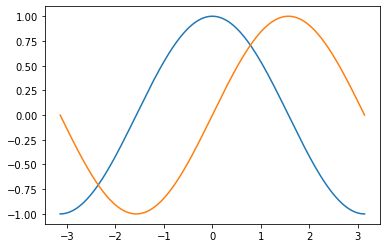

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X,C)
plt.plot(X,S)

#### Customization 

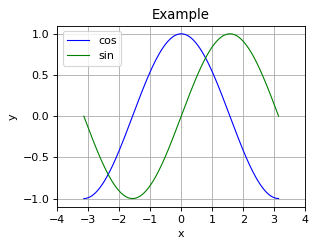

In [50]:
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label="cos")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sin")
plt.xlim(-4.0, 4.0)
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
plt.savefig("example.png", dpi=72)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example")
plt.legend(loc="best")

#### Multiple plots

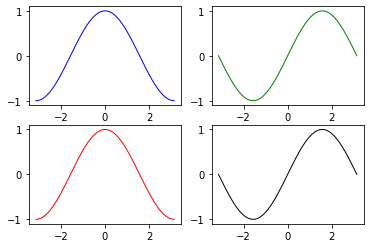

In [51]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label="cos")
plt.subplot(2, 2, 2)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sin")
plt.subplot(2, 2, 3)
plt.plot(X, C, color="red", linewidth=1.0, linestyle="-", label="cos")
plt.subplot(2, 2, 4)
plt.plot(X, S, color="black", linewidth=1.0, linestyle="-", label="sin")
plt.show()

### Examples

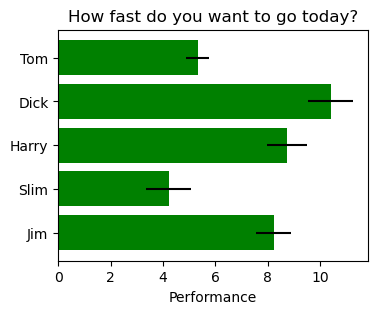

In [52]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,3))
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

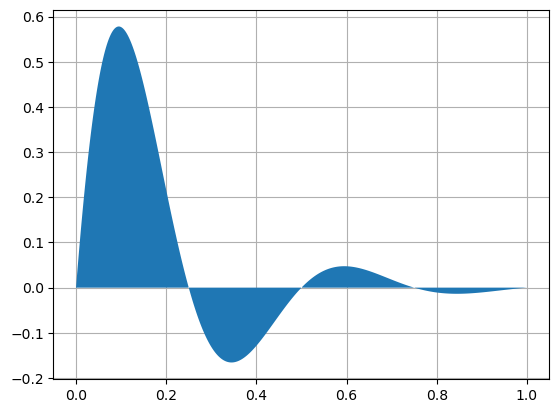

In [53]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
fig, ax = plt.subplots()
ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

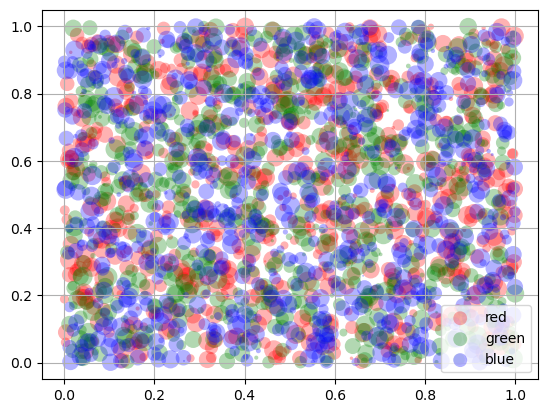

In [54]:
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

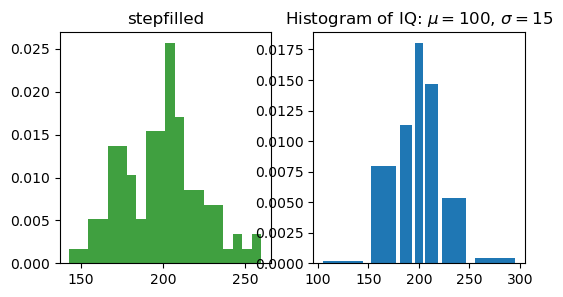

In [55]:
mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 3))
ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')
# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$');

In [56]:
from matplotlib import colors, ticker, cm
from scipy.stats import multivariate_normal

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X; pos[:,:,1] = Y
# A low hump with a spike coming out of the top right.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
z = (multivariate_normal([0.1, 0.2], [[1.0, 0.],[0, 1.0]]).pdf(pos)
     + 0.1 * (multivariate_normal([1.0, 1.0],[[0.01, 0.],[0., 0.01]])).pdf(pos))
# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots(figsize=(4,3))
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)


<img src="seaborn.png" style="width:100%">

<img src="bokeh.png" style="width:100%">

<img src="Pandas_logo.svg">

## Pandas
Pandas is a high-performance, high-level library that provides tools for data analysis.  
It relies on the concept of DataFrame: a structured collection of data organized in records. This is the same concept of ROOT's `NTuple` that you are familiar with.  
I think the name comes from R.
<img src="dataframe.jpg" style="width:50%">

In [57]:
import numpy as np
import pandas as pd

s = pd.Series( [1., 2., 3., np.nan, 5. ], index=["a","b","c","d","e"])
s

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
dtype: float64

In [58]:
df = pd.DataFrame( 
    {
        'Col1': [1.,2.,3.,4.],
        'Col2': ["a","b","c","d"],
        'Col3': [True, False, True, True]
    }
)
df

Col1 Col2   Col3
0   1.0    a   True
1   2.0    b  False
2   3.0    c   True
3   4.0    d   True

### Reading/Saving dataframes
Pandas support reading writing to several data formats, via specialized routines, many other formats, because dataframe (with other names) are a common concept:

| Format Type  | Data Description  | Reader           | Writer          |
|--------------|-------------------|------------------|-----------------|
| text         | CSV               | `read_csv`       | `to_csv`        |
| text         | JSON              | `read_json`      | `to_json`       |
| text         | HTML              | `read_html`      | `to_html`       |
| text 	       | Local clipboard   | `read_clipboard` | `to_clipboard ` |
| binary       | MS Excel          | `read_excel`     | `to_excel`      |
| binary       | HDF5 Format       | `read_hdf` |	`to_hdf` |
| binary       | Feather Format    | `read_feather` |	`to_feather` |
| binary       | Parquet Format    | `read_parquet` |	`to_parquet` |
| binary       | Msgpack           | `read_msgpack` | `to_msgpack` |
| binary       | Stata             | `read_stata` | 	`to_stata` |
| binary       | SAS               | `read_sas` | | 	 
| binary       | Pickle Format     | `read_pickle` |	`to_pickle` |
| SQL 	       | SQL 	           | `read_sql` | `to_sql` |
| SQL 	       | Google Big Query  | `read_gbq` | 	`to_gbq` |

As you can see the physicists *ROOT* format is not natively supported. However some external software to read `TTree`s are available. For example [`uproot`](https://github.com/scikit-hep/uproot). ROOT usually comes with pre-installed `pyROOT` library.

In [59]:
df.dtypes

Col1    float64
Col2     object
Col3       bool
dtype: object

In [60]:
df.columns

Index(['Col1', 'Col2', 'Col3'], dtype='object')

In [61]:
df.index

RangeIndex(start=0, stop=4, step=1)

### View data

In [62]:

df = pd.DataFrame( {'A':np.random.randint(0,10,100), 'B': [2**x for x in np.arange(100)], 'C':"a"})
df.head()

A   B  C
0  9   1  a
1  9   2  a
2  9   4  a
3  0   8  a
4  3  16  a

In [63]:
df.tail(2)

A  B  C
98  0  0  a
99  7  0  a

In [64]:
df.describe()

A             B
count  100.000000  1.000000e+02
mean     4.150000 -2.560000e+00
std      3.176222  1.070389e+18
min      0.000000 -9.223372e+18
25%      1.000000  0.000000e+00
50%      4.000000  6.144000e+03
75%      7.000000  1.717987e+11
max      9.000000  4.611686e+18

### Select data

In [65]:
dates = pd.date_range('20190527',periods=7)
df = pd.DataFrame( np.random.rand(7,4), index=dates, columns=['A','B','C','D'])
df

A         B         C         D
2019-05-27  0.272727  0.782185  0.871513  0.764663
2019-05-28  0.063530  0.615451  0.009551  0.969182
2019-05-29  0.635973  0.778371  0.927694  0.971305
2019-05-30  0.610504  0.943599  0.580770  0.994840
2019-05-31  0.738883  0.543482  0.686757  0.532077
2019-06-01  0.247118  0.453881  0.635333  0.659595
2019-06-02  0.215886  0.674861  0.180832  0.140780

In [66]:
df['A'] # or df.A

2019-05-27    0.272727
2019-05-28    0.063530
2019-05-29    0.635973
2019-05-30    0.610504
2019-05-31    0.738883
2019-06-01    0.247118
2019-06-02    0.215886
Freq: D, Name: A, dtype: float64

In [67]:
df[0:2]

A         B         C         D
2019-05-27  0.272727  0.782185  0.871513  0.764663
2019-05-28  0.063530  0.615451  0.009551  0.969182

In [68]:
df['20190529':'20190531']

A         B         C         D
2019-05-29  0.635973  0.778371  0.927694  0.971305
2019-05-30  0.610504  0.943599  0.580770  0.994840
2019-05-31  0.738883  0.543482  0.686757  0.532077

In [69]:
dates

DatetimeIndex(['2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-01', '2019-06-02'],
              dtype='datetime64[ns]', freq='D')

In [70]:
df.loc[dates[2]]

A    0.635973
B    0.778371
C    0.927694
D    0.971305
Name: 2019-05-29 00:00:00, dtype: float64

In [71]:
df.loc[dates[2],['B','C']]

B    0.778371
C    0.927694
Name: 2019-05-29 00:00:00, dtype: float64

In [72]:
df.iloc[2,1:3]

B    0.778371
C    0.927694
Name: 2019-05-29 00:00:00, dtype: float64

In [73]:
df[ df>0.5 ]

A         B         C         D
2019-05-27       NaN  0.782185  0.871513  0.764663
2019-05-28       NaN  0.615451       NaN  0.969182
2019-05-29  0.635973  0.778371  0.927694  0.971305
2019-05-30  0.610504  0.943599  0.580770  0.994840
2019-05-31  0.738883  0.543482  0.686757  0.532077
2019-06-01       NaN       NaN  0.635333  0.659595
2019-06-02       NaN  0.674861       NaN       NaN

### Setting values

In [74]:
s = pd.Series( np.random.rand(7), index=dates )
s

2019-05-27    0.084900
2019-05-28    0.337333
2019-05-29    0.465100
2019-05-30    0.517110
2019-05-31    0.688339
2019-06-01    0.455821
2019-06-02    0.907693
Freq: D, dtype: float64

In [75]:
df['E'] = s
df

A         B         C         D         E
2019-05-27  0.272727  0.782185  0.871513  0.764663  0.084900
2019-05-28  0.063530  0.615451  0.009551  0.969182  0.337333
2019-05-29  0.635973  0.778371  0.927694  0.971305  0.465100
2019-05-30  0.610504  0.943599  0.580770  0.994840  0.517110
2019-05-31  0.738883  0.543482  0.686757  0.532077  0.688339
2019-06-01  0.247118  0.453881  0.635333  0.659595  0.455821
2019-06-02  0.215886  0.674861  0.180832  0.140780  0.907693

In [76]:
df.loc[:,['C']] = 0
df

A         B    C         D         E
2019-05-27  0.272727  0.782185  0.0  0.764663  0.084900
2019-05-28  0.063530  0.615451  0.0  0.969182  0.337333
2019-05-29  0.635973  0.778371  0.0  0.971305  0.465100
2019-05-30  0.610504  0.943599  0.0  0.994840  0.517110
2019-05-31  0.738883  0.543482  0.0  0.532077  0.688339
2019-06-01  0.247118  0.453881  0.0  0.659595  0.455821
2019-06-02  0.215886  0.674861  0.0  0.140780  0.907693

### Operations

In [77]:
df.mean()

A    0.397803
B    0.684547
C    0.000000
D    0.718920
E    0.493756
dtype: float64

In [78]:
df.mean(axis=1)

2019-05-27    0.380895
2019-05-28    0.397099
2019-05-29    0.570150
2019-05-30    0.613211
2019-05-31    0.500556
2019-06-01    0.363283
2019-06-02    0.387844
Freq: D, dtype: float64

## Merging dataframes

In [79]:
df1 = pd.DataFrame( np.random.rand(7,2), index=dates, columns=['A','B'])
df2 = pd.DataFrame( np.random.rand(7,3), index=dates, columns=['C','D','E'])
pd.concat([df1,df2],sort=False)

A         B         C         D         E
2019-05-27  0.933696  0.595231       NaN       NaN       NaN
2019-05-28  0.743323  0.174635       NaN       NaN       NaN
2019-05-29  0.534813  0.248670       NaN       NaN       NaN
2019-05-30  0.515590  0.645915       NaN       NaN       NaN
2019-05-31  0.034665  0.791540       NaN       NaN       NaN
2019-06-01  0.408191  0.827338       NaN       NaN       NaN
2019-06-02  0.333172  0.726970       NaN       NaN       NaN
2019-05-27       NaN       NaN  0.021164  0.856063  0.664016
2019-05-28       NaN       NaN  0.987556  0.649094  0.277106
2019-05-29       NaN       NaN  0.545813  0.103561  0.637652
2019-05-30       NaN       NaN  0.478624  0.849072  0.540173
2019-05-31       NaN       NaN  0.230484  0.758756  0.457617
2019-06-01       NaN       NaN  0.061748  0.648818  0.480178
2019-06-02       NaN       NaN  0.643230  0.200065  0.312921

In [80]:
pd.concat([df1,df2],axis=1,join='inner') #same syntax as for db (ineer, outer, left, right)

A         B         C         D         E
2019-05-27  0.933696  0.595231  0.021164  0.856063  0.664016
2019-05-28  0.743323  0.174635  0.987556  0.649094  0.277106
2019-05-29  0.534813  0.248670  0.545813  0.103561  0.637652
2019-05-30  0.515590  0.645915  0.478624  0.849072  0.540173
2019-05-31  0.034665  0.791540  0.230484  0.758756  0.457617
2019-06-01  0.408191  0.827338  0.061748  0.648818  0.480178
2019-06-02  0.333172  0.726970  0.643230  0.200065  0.312921

### Grouping

In [81]:
s = pd.Series( ["a","b","a","c","a","c","b"], index=dates)
df['E']=s
df

A         B    C         D  E
2019-05-27  0.272727  0.782185  0.0  0.764663  a
2019-05-28  0.063530  0.615451  0.0  0.969182  b
2019-05-29  0.635973  0.778371  0.0  0.971305  a
2019-05-30  0.610504  0.943599  0.0  0.994840  c
2019-05-31  0.738883  0.543482  0.0  0.532077  a
2019-06-01  0.247118  0.453881  0.0  0.659595  c
2019-06-02  0.215886  0.674861  0.0  0.140780  b

In [82]:
df.groupby('E').sum()

A         B    C         D
E                                   
a  1.647583  2.104038  0.0  2.268045
b  0.279415  1.290312  0.0  1.109962
c  0.857622  1.397480  0.0  1.654435

### Pivot table

In [83]:
dates = pd.date_range('20190527',periods=6, name='date')
df = pd.DataFrame( np.random.rand(6,3), index=dates, columns=['A','B','C'])
df['D'] = pd.Series(["a","a","b","b","c","c"],index=dates)
df['E'] = pd.Series(["one","two","one","two","one","two"],index=dates)
df

A         B         C  D    E
date                                            
2019-05-27  0.829799  0.720495  0.173438  a  one
2019-05-28  0.252488  0.014775  0.521227  a  two
2019-05-29  0.646422  0.112209  0.143434  b  one
2019-05-30  0.841273  0.665084  0.762137  b  two
2019-05-31  0.780462  0.595384  0.826812  c  one
2019-06-01  0.551363  0.768771  0.079635  c  two

In [84]:
pd.pivot_table(df, values=['A','B','C'], index=['D','E'])

A         B         C
D E                                
a one  0.829799  0.720495  0.173438
  two  0.252488  0.014775  0.521227
b one  0.646422  0.112209  0.143434
  two  0.841273  0.665084  0.762137
c one  0.780462  0.595384  0.826812
  two  0.551363  0.768771  0.079635

### Plotting data

<AxesSubplot:xlabel='date'>

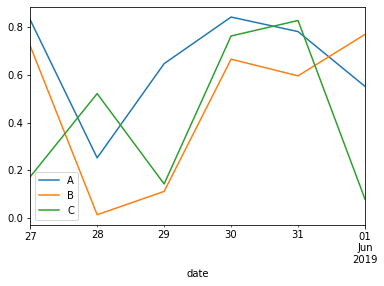

In [85]:
%matplotlib inline
df.plot()

In [30]:
!pwd

/Users/carlo/repos/pycourse/Slides


In [31]:
!whoami

carlo
